Center point:
class0 center: [-7.863429245966886, 4.05171047973711]
class1 center: [3.0408404062855077, 8.807047791322358]
class2 center: [-4.577695468793537, -4.884489731339217]
class3 center: [4.681187282893935, 3.1690003648015157]
class4 center: [-3.940240522232898, 3.6846625615391098]

Length of data: 500

new data: [0.1125078070382628, 4.070436057141862]

Length of euclidean distances: 500

가장 가까운 거리 11개 indices: [337, 433, 417, 459, 338, 480, 448, 416, 331, 424, 423]

가장 가까운 11개의 class별 갯수: {0: 0, 1: 0, 2: 0, 3: 3, 4: 8}
new data class: 4


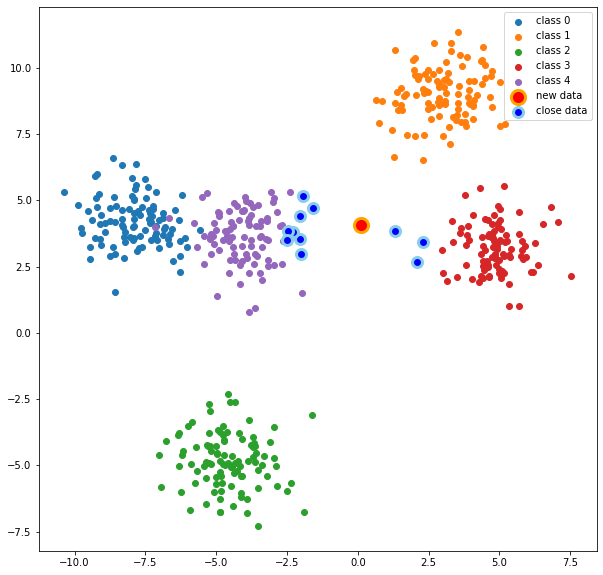

In [1]:
import random
import matplotlib.pyplot as plt
random.seed(14)

# --- Data Generation
n_class, n_data = 5, 100
centers = []
for _ in range(n_class):
    centers.append([random.uniform(-10,10) for _ in range(2)])      # random.uniform(): 두수 사이의 랜덤실수를 리턴

print('Center point:')
for center_idx, center in enumerate(centers):
    print(f'class{center_idx} center: {center}')

x_data, y_data = [], []
for class_idx in range(n_class):
    center = centers[class_idx]
    
    class_x_data, class_y_data = [], []
    for _ in range(n_data):
        x1 = center[0] + random.gauss(0,1)
        x2 = center[1] + random.gauss(0,1)
        class_x_data.append([x1,x2])
        class_y_data.append(class_idx)
    
    x_data += class_x_data
    y_data += class_y_data
print(f'\nLength of data: {len(x_data)}\n')

new_data = [random.uniform(-10,10) for _ in range(2)]
print(f'new data: {new_data}\n')
# ---

# --- Data Visualization
fig, ax = plt.subplots(figsize=(10,10))

for class_idx in range(n_class):
    class_x_data = x_data[class_idx*n_data : (class_idx + 1)*n_data]
    x1_data = [x[0] for x in class_x_data]
    x2_data = [x[1] for x in class_x_data]

    ax.scatter(x1_data, x2_data, label=f'class {class_idx}')
ax.scatter(new_data[0], new_data[1], s=200, label = 'new data',
           color='r',edgecolor='orange',linewidth=3)
ax.legend()
# ---

# --- Calculation of Distance
e_distances = []
for x in x_data:
    diff_square = ((x[0] - new_data[0])**2 + (x[1] - new_data[1])**2)**0.5
    e_distances.append(diff_square)
print(f'Length of euclidean distances: {len(e_distances)}\n')
# ---

# --- Distance Sorting(오름차순)
K = 11

sorted_distances = []
sorted_indices = []
for _ in range(K):
    m, m_idx = None, 0
    for data_idx, distance in enumerate(e_distances):
        if data_idx in sorted_indices:
            pass
        elif m == None or distance < m:
            m = distance
            m_idx = data_idx
    sorted_distances.append(m)
    sorted_indices.append(m_idx)
print(f'가장 가까운 거리 {K}개 indices: {sorted_indices}\n')

close_x1_data = [x_data[close_idx][0] for close_idx in sorted_indices]
close_x2_data = [x_data[close_idx][1] for close_idx in sorted_indices]
ax.scatter(close_x1_data, close_x2_data, label='close data',
            s=100, color='b',edgecolor='skyblue', linewidth=3)
ax.legend()
# ---

# --- Classification
class_dict = {}
for class_idx in range(n_class):
    class_dict[class_idx] = 0
for sorted_idx in sorted_indices:
    class_dict[y_data[sorted_idx]] += 1
print(f'가장 가까운 {K}개의 class별 갯수: {class_dict}')

M, M_idx = None, 0
for class_idx, class_freq in class_dict.items():
    if M == None or class_freq > M:
        M = class_freq
        M_idx = class_idx
new_data_class = M_idx
print(f'new data class: {new_data_class}')
# ---